In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from fastai.tabular.all import *

pd.options.display.max_columns = 70

In [6]:
path = Path('C:/Users/Arpan/Downloads/Education/Project/Rossmann-Sales-Prediction')

In [7]:
train = pd.read_csv(path/'Data'/'train.csv', low_memory=False, parse_dates=[2])
test = pd.read_csv(path/'Data'/'test.csv', low_memory=False, parse_dates=[3])
store = pd.read_csv(path/'Data'/'store.csv', low_memory=False)

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  int64         
 7   StateHoliday   1017209 non-null  object        
 8   SchoolHoliday  1017209 non-null  int64         
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 69.8+ MB


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             41088 non-null  int64         
 1   Store          41088 non-null  int64         
 2   DayOfWeek      41088 non-null  int64         
 3   Date           41088 non-null  datetime64[ns]
 4   Open           41077 non-null  float64       
 5   Promo          41088 non-null  int64         
 6   StateHoliday   41088 non-null  object        
 7   SchoolHoliday  41088 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 2.5+ MB


In [10]:
store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [11]:
# train test desc
print(train.describe())
print('-'*100)
print(test.describe())

              Store     DayOfWeek         Sales     Customers          Open  \
count  1.017209e+06  1.017209e+06  1.017209e+06  1.017209e+06  1.017209e+06   
mean   5.584297e+02  3.998341e+00  5.773819e+03  6.331459e+02  8.301067e-01   
std    3.219087e+02  1.997391e+00  3.849926e+03  4.644117e+02  3.755392e-01   
min    1.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    2.800000e+02  2.000000e+00  3.727000e+03  4.050000e+02  1.000000e+00   
50%    5.580000e+02  4.000000e+00  5.744000e+03  6.090000e+02  1.000000e+00   
75%    8.380000e+02  6.000000e+00  7.856000e+03  8.370000e+02  1.000000e+00   
max    1.115000e+03  7.000000e+00  4.155100e+04  7.388000e+03  1.000000e+00   

              Promo  SchoolHoliday  
count  1.017209e+06   1.017209e+06  
mean   3.815145e-01   1.786467e-01  
std    4.857586e-01   3.830564e-01  
min    0.000000e+00   0.000000e+00  
25%    0.000000e+00   0.000000e+00  
50%    0.000000e+00   0.000000e+00  
75%    1.000000e+00   0.00000

- Train has customers, test does not. We won't have customer data while prediction, better to drop.
- Sales needs to be float64

In [12]:
# store desc
print(store.describe())

            Store  CompetitionDistance  CompetitionOpenSinceMonth  \
count  1115.00000          1112.000000                 761.000000   
mean    558.00000          5404.901079                   7.224704   
std     322.01708          7663.174720                   3.212348   
min       1.00000            20.000000                   1.000000   
25%     279.50000           717.500000                   4.000000   
50%     558.00000          2325.000000                   8.000000   
75%     836.50000          6882.500000                  10.000000   
max    1115.00000         75860.000000                  12.000000   

       CompetitionOpenSinceYear       Promo2  Promo2SinceWeek  Promo2SinceYear  
count                761.000000  1115.000000       571.000000       571.000000  
mean                2008.668857     0.512108        23.595447      2011.763573  
std                    6.195983     0.500078        14.141984         1.674935  
min                 1900.000000     0.000000         1

In [13]:
# check nan values
print(train.isna().sum())
print('-'*100)
print(test.isna().sum())
print('-'*100)
print(store.isna().sum())

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64
----------------------------------------------------------------------------------------------------
Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64
----------------------------------------------------------------------------------------------------
Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64


In [14]:
# unique values per column in store
store.nunique()

Store                        1115
StoreType                       4
Assortment                      3
CompetitionDistance           654
CompetitionOpenSinceMonth      12
CompetitionOpenSinceYear       23
Promo2                          2
Promo2SinceWeek                24
Promo2SinceYear                 7
PromoInterval                   3
dtype: int64

In [15]:
# Competition Open nan values
store[store['CompetitionOpenSinceMonth'].isna()].sample(20)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
217,218,a,c,640.0,NaN,NaN,1,9.0,2011.0,"Mar,Jun,Sept,Dec"
421,422,a,c,2880.0,NaN,NaN,0,NaN,NaN,NaN
272,273,a,c,8480.0,NaN,NaN,0,NaN,NaN,NaN
68,69,c,c,1130.0,NaN,NaN,1,40.0,2011.0,"Jan,Apr,Jul,Oct"
972,973,d,c,330.0,NaN,NaN,1,28.0,2012.0,"Jan,Apr,Jul,Oct"
879,880,a,c,4570.0,NaN,NaN,0,NaN,NaN,NaN
741,742,d,c,4380.0,NaN,NaN,0,NaN,NaN,NaN
183,184,d,c,3560.0,NaN,NaN,0,NaN,NaN,NaN
779,780,a,a,18160.0,NaN,NaN,0,NaN,NaN,NaN
441,442,c,a,500.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"


In [16]:
# fill 0 for nans - gave higher score than median/mean imputation
store.fillna(0, inplace = True)

In [17]:
# merge store with train and test
trainmerge = train.merge(store)
testmerge = test.merge(store)
trainmerge.shape, testmerge.shape

((1017209, 18), (41088, 17))

<AxesSubplot:>

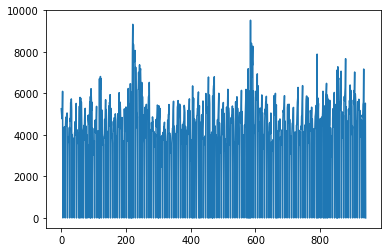

In [18]:
# store sales
trainmerge[trainmerge.Store == 1]['Sales'].plot()

Drop rows with 0 sales

In [19]:
trainmerge = trainmerge[trainmerge.Sales!=0]

In [20]:
# test has na values in Open, fill with 1
testmerge.Open.fillna(1, inplace = True)

In [21]:
# datatypes
print(trainmerge.dtypes)
print('-'*100)
print(testmerge.dtypes)

Store                                 int64
DayOfWeek                             int64
Date                         datetime64[ns]
Sales                                 int64
Customers                             int64
Open                                  int64
Promo                                 int64
StateHoliday                         object
SchoolHoliday                         int64
StoreType                            object
Assortment                           object
CompetitionDistance                 float64
CompetitionOpenSinceMonth           float64
CompetitionOpenSinceYear            float64
Promo2                                int64
Promo2SinceWeek                     float64
Promo2SinceYear                     float64
PromoInterval                        object
dtype: object
----------------------------------------------------------------------------------------------------
Id                                    int64
Store                                 int64
DayOf

In [22]:
# unique values
print(trainmerge.nunique())
print('-'*100)
print(testmerge.nunique())

Store                         1115
DayOfWeek                        7
Date                           942
Sales                        21733
Customers                     4083
Open                             1
Promo                            2
StateHoliday                     4
SchoolHoliday                    2
StoreType                        4
Assortment                       3
CompetitionDistance            655
CompetitionOpenSinceMonth       13
CompetitionOpenSinceYear        24
Promo2                           2
Promo2SinceWeek                 25
Promo2SinceYear                  8
PromoInterval                    4
dtype: int64
----------------------------------------------------------------------------------------------------
Id                           41088
Store                          856
DayOfWeek                        7
Date                            48
Open                             2
Promo                            2
StateHoliday                     2
SchoolHolid

In [23]:
# Changin datatypes
trainmerge['Sales'] = trainmerge['Sales'].astype(np.float64)

trainmerge['CompetitionOpenSinceMonth'] = trainmerge['CompetitionOpenSinceMonth'].astype(np.int64)
trainmerge['CompetitionOpenSinceYear'] = trainmerge['CompetitionOpenSinceYear'].astype(np.int64)

trainmerge['Promo2SinceWeek'] = trainmerge['Promo2SinceWeek'].astype(np.int64)
trainmerge['Promo2SinceYear'] = trainmerge['Promo2SinceYear'].astype(np.int64)

testmerge['CompetitionOpenSinceMonth'] = testmerge['CompetitionOpenSinceMonth'].astype(np.int64)
testmerge['CompetitionOpenSinceYear'] = testmerge['CompetitionOpenSinceYear'].astype(np.int64)

testmerge['Promo2SinceWeek'] = testmerge['Promo2SinceWeek'].astype(np.int64)
testmerge['Promo2SinceYear'] = testmerge['Promo2SinceYear'].astype(np.int64)

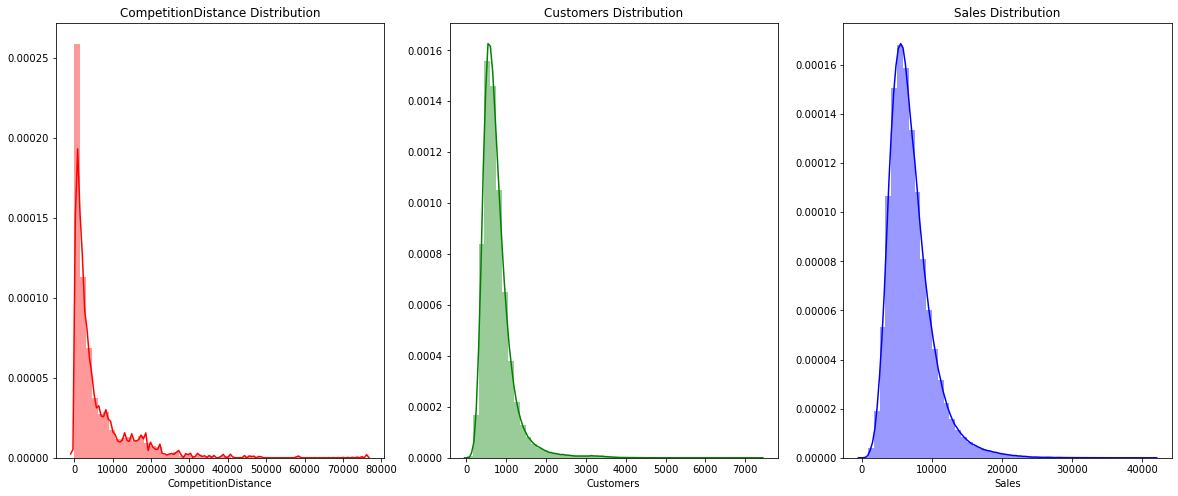

In [24]:
# continuous features
cont = ['CompetitionDistance', 'Customers', 'Sales']
colors = ['red', 'green', 'blue']
fig, axs = plt.subplots(1, len(cont), figsize = (20, 8))
for c in range(len(cont)):    
    sns.distplot(trainmerge[cont[c]], color = colors[c], ax = axs[c])
    axs[c].set_title(f'{cont[c]} Distribution')
plt.show()    

Customer and sales have similar distribution, slightly skewed towards right. Less than 75% stores earn more than 8000 dollars a day.<br>
Almost 90% competitors of store at a distance lesser than 10000. Some outliers are present here.

In [25]:
print('Sales Statistics\n')
print(trainmerge['Sales'].describe())

Sales Statistics

count    844338.000000
mean       6955.959134
std        3103.815515
min          46.000000
25%        4859.000000
50%        6369.000000
75%        8360.000000
max       41551.000000
Name: Sales, dtype: float64


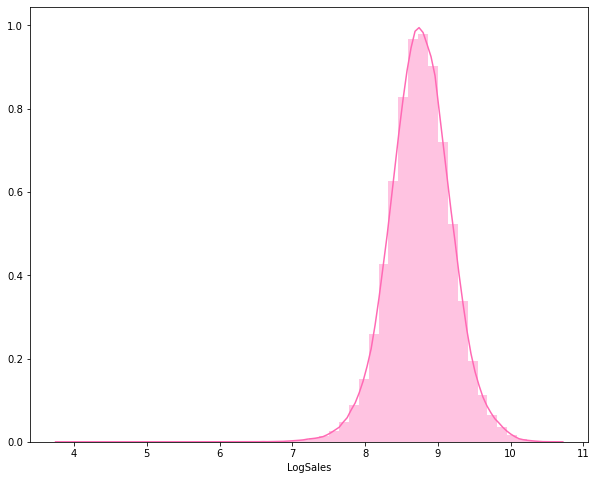

In [26]:
# log transformation - much better distribution, reduces skew
trainmerge['LogSales'] = np.log(trainmerge['Sales'])
plt.figure(figsize=(10,8))
sns.distplot(trainmerge['LogSales'], color = 'hotpink')
plt.show()

In [27]:
# categorical data
cat = [ct for ct in trainmerge.columns if ct not in cont]
cat

['Store',
 'DayOfWeek',
 'Date',
 'Open',
 'Promo',
 'StateHoliday',
 'SchoolHoliday',
 'StoreType',
 'Assortment',
 'CompetitionOpenSinceMonth',
 'CompetitionOpenSinceYear',
 'Promo2',
 'Promo2SinceWeek',
 'Promo2SinceYear',
 'PromoInterval',
 'LogSales']

In [42]:
def plot_store(store, df, ax = None):
    """Plots Sales for store number"""
    plt.title(f'Sales Store {store}')
    df[df['Store']==store].groupby('Date')['Sales'].mean().plot(figsize = (10,8), ax = ax, color = 'orange')
    plt.show()

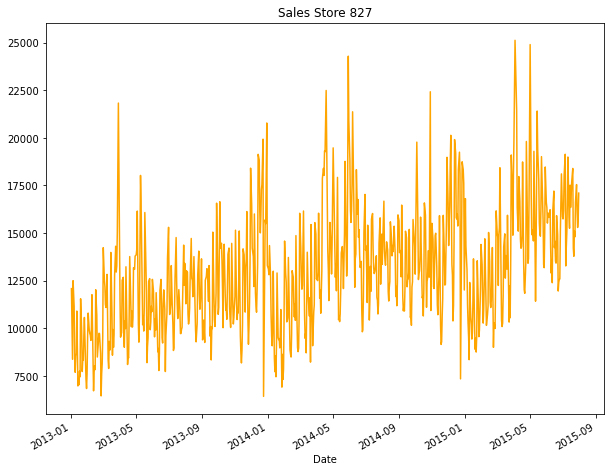

In [43]:
# plot for random stores
import random
i = random.randint(0, len(store))
plot_store(i, trainmerge)

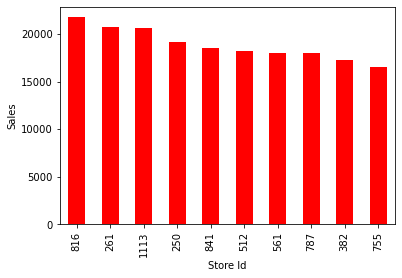

In [36]:
# top 10 stores with highest average sales
top10stores = trainmerge.groupby('Store').agg({'Sales': ['mean','std']}).reset_index()['Sales'].sort_values('mean', ascending = False)[:10]
top10stores['mean'].plot(kind = 'bar', color = 'r')
plt.ylabel('Sales')
plt.xlabel('Store Id')
plt.show()

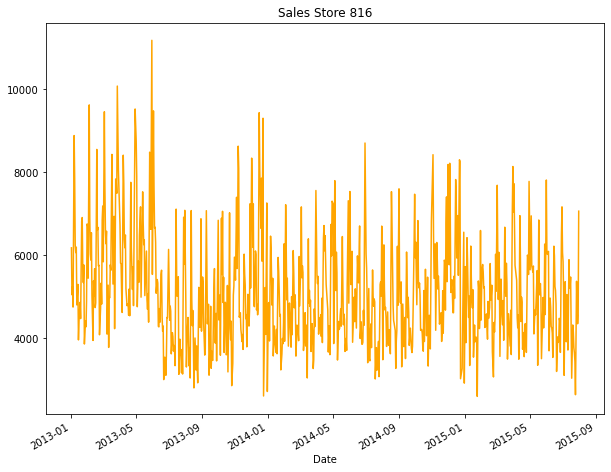

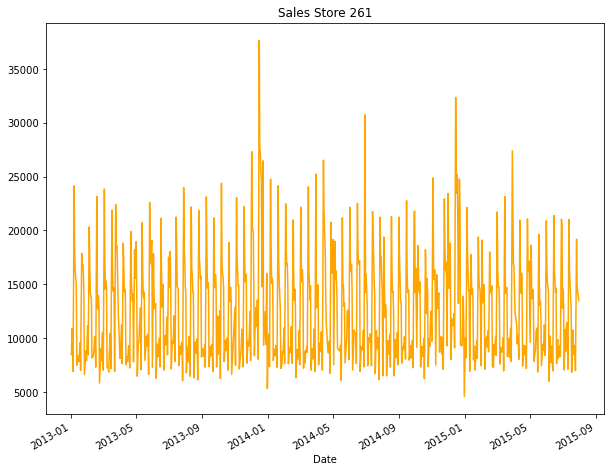

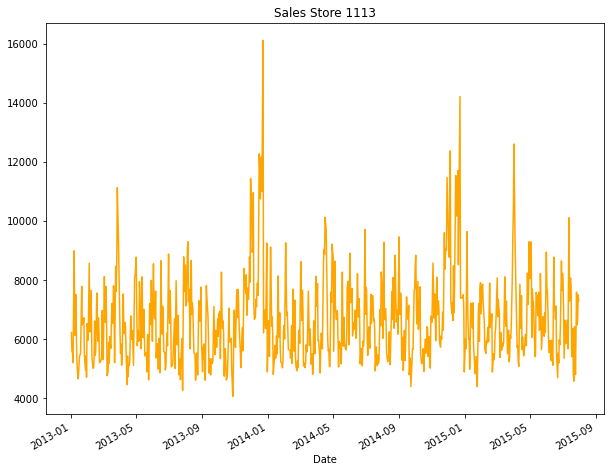

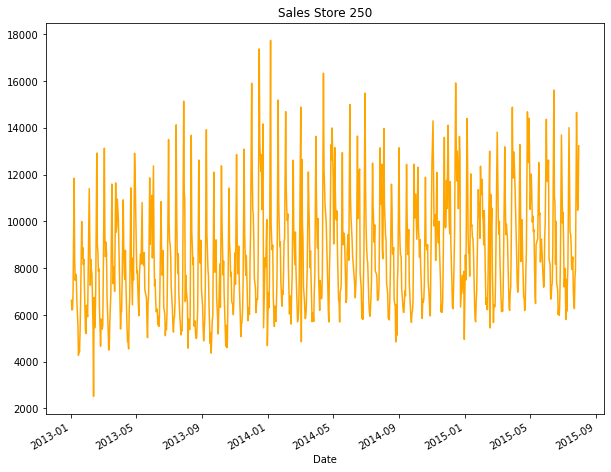

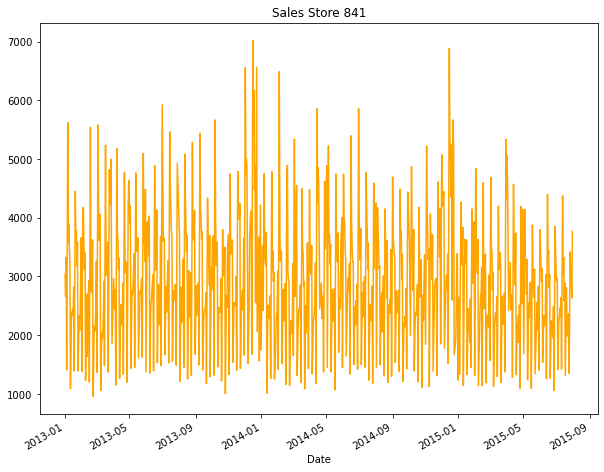

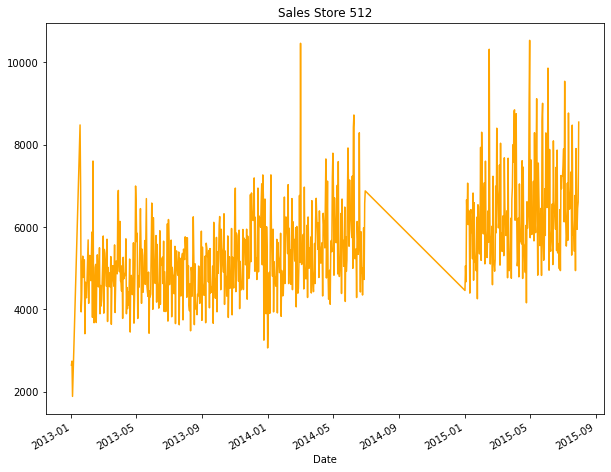

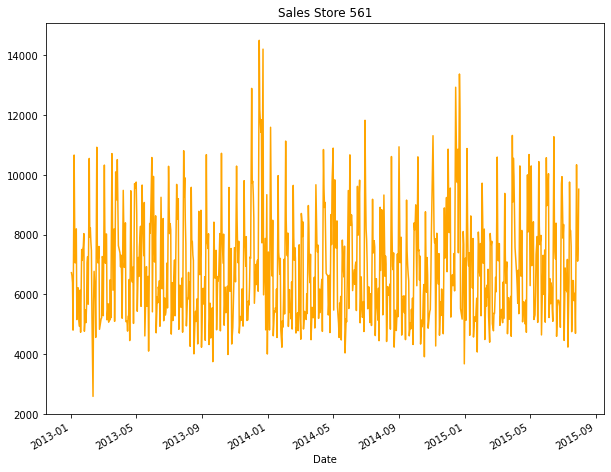

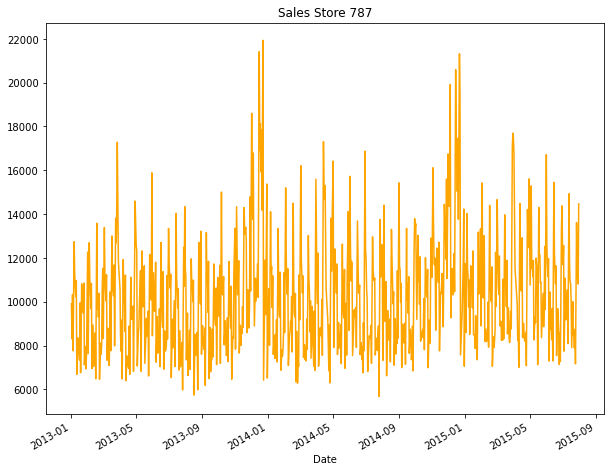

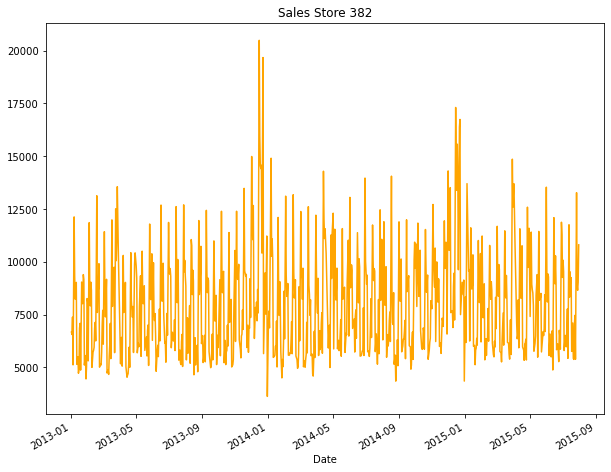

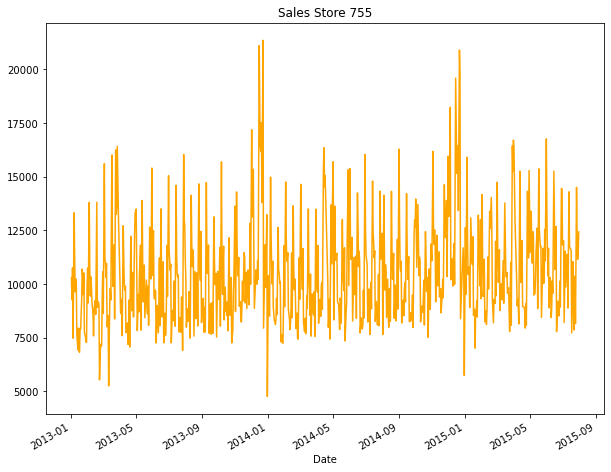

In [44]:
for i in range(len(top10stores.index)):
    plot_store(top10stores.index[i], trainmerge)

Store 512, had a large time gap where maybe it was closed for some time. We removed all the rows with sales 0 so all those rows were also removed. 

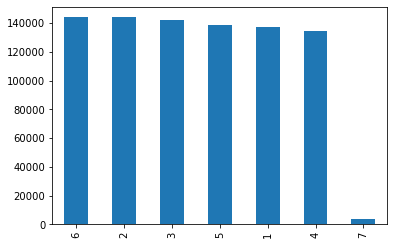

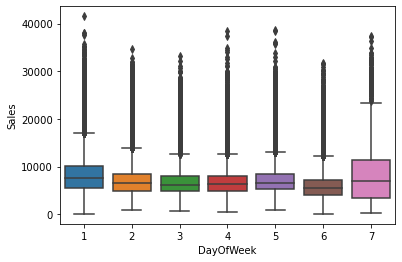

Sales                     
                  mean          std   count
DayOfWeek                                  
1          8216.252259  3691.609734  137557
2          7088.409086  3065.959513  143955
3          6728.786679  2781.109588  141922
4          6768.214973  2763.625181  134626
5          7073.034133  2764.528736  138633
6          5875.084935  2852.537857  144052
7          8224.723908  6235.152960    3593

In [46]:
# day of week
trainmerge['DayOfWeek'].value_counts().plot(kind = 'bar')
plt.show()

sns.boxplot(x = 'DayOfWeek', y = 'Sales', data = trainmerge)
plt.show()

trainmerge.groupby('DayOfWeek').agg({'Sales': ['mean', 'std', 'count']})

`Mon & Sun` have highest average sales 8216 & 8214 respectively.<br>
Sunday has very high deviation (6235) and very few stores keep open on sundays.

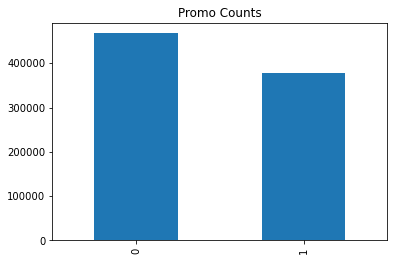

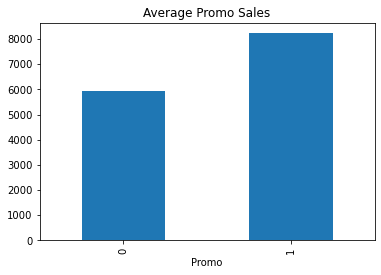

In [47]:
# PROMO
plt.title('Promo Counts')
trainmerge.Promo.value_counts().plot(kind = 'bar')
plt.show()

plt.title('Average Promo Sales')
trainmerge.groupby('Promo')['Sales'].mean().plot(kind = 'bar')
plt.show()

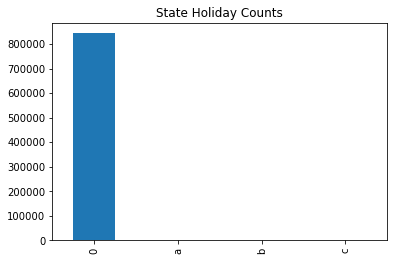

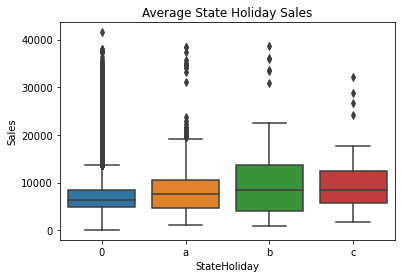

In [48]:
# state holiday

plt.title('State Holiday Counts')
trainmerge.StateHoliday.value_counts().plot(kind = 'bar')
plt.show()

plt.title('Average State Holiday Sales')
sns.boxplot(x = 'StateHoliday', y = 'Sales', data = trainmerge)
plt.show()

In [49]:
print('Number of stores kept open on State Holiday: ', len(trainmerge[trainmerge.StateHoliday!='0']))
print('Average sales on state holiday: ',round(trainmerge[trainmerge.StateHoliday!='0'].Sales.mean()))

Number of stores kept open on State Holiday:  910
Average sales on state holiday:  8809


Stores are mostly closed on state holidays, however if a few stores are open on a state holiday, they have higher median sales.

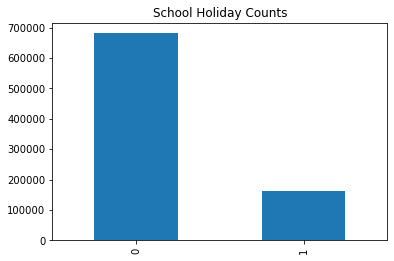

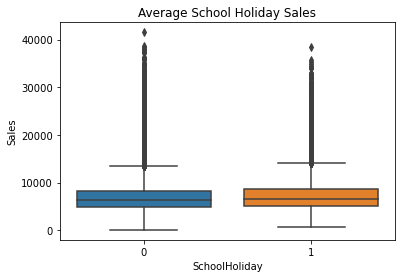

In [50]:
# School Holiday
plt.title('School Holiday Counts')
trainmerge.SchoolHoliday.value_counts().plot(kind = 'bar')
plt.show()

plt.title('Average School Holiday Sales')
sns.boxplot(x = 'SchoolHoliday', y = 'Sales', data = trainmerge)
plt.show()

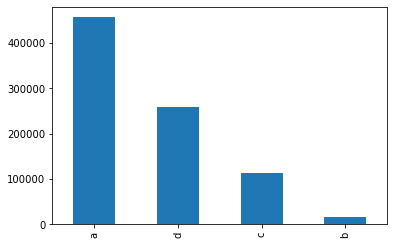

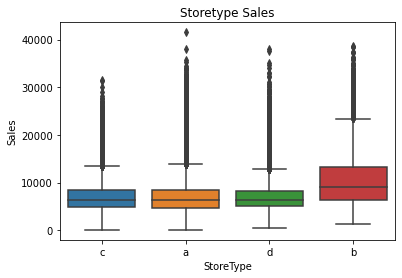

In [51]:
# Store Type
trainmerge['StoreType'].value_counts().plot(kind = 'bar')
plt.show()

plt.title('Storetype Sales')
sns.boxplot(x = 'StoreType', y = 'Sales', data = trainmerge)
plt.show()

Store model b has higher sales than others, though they are not as frequent and vary a lot.

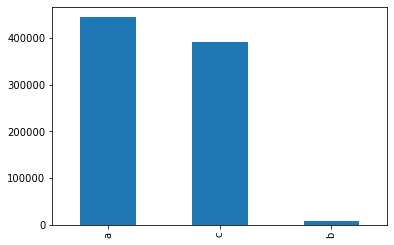

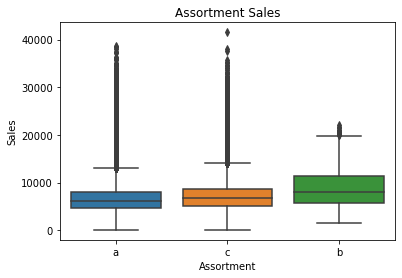

In [52]:
#assortment

trainmerge['Assortment'].value_counts().plot(kind = 'bar')
plt.show()

plt.title('Assortment Sales')
sns.boxplot(x = 'Assortment', y = 'Sales', data = trainmerge)
plt.show()

In [53]:
# feature engg
def get_features(df):

    df = df.copy()
    df = add_datepart(df, 'Date', drop = False).drop('DayOfWeek', axis = 1)
    # promo interval
    mapping = {1:'Jan', 2:'Feb', 3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
    df['MonthInPromoInt']= df[['PromoInterval','Month']].apply(lambda x: 1 if str(mapping[x['Month']]) in str(x['PromoInterval']).split(',') else 0, axis = 1)
        
    
    # competition open since in months
    df[['CompetitionOpenSinceYear','CompetitionOpenSinceMonth']] = df[['CompetitionOpenSinceYear','CompetitionOpenSinceMonth']].astype(np.int64)
    df['compOpenMonths'] = 12*(df.Year - df.CompetitionOpenSinceYear) + (df.Month - df.CompetitionOpenSinceMonth).astype(np.float64)
    df['compOpenMonths'] = df['compOpenMonths'].apply(lambda x: x if x>0 and x<1000 else 0)
    
    
    # promo open since in months
    df[['Promo2SinceWeek','Promo2SinceYear']] = df[['Promo2SinceWeek','Promo2SinceYear']].astype(np.int64)
    df['promoOpenMonths'] = 12*(df.Year - df.Promo2SinceYear) + abs((df.Week - df.Promo2SinceWeek))/4
    df['promoOpenMonths'] = df['promoOpenMonths'].apply(lambda x: x if x>0 and x<1000 else 0)
    
    
    
    # comp distance bin
    def compbin(x):
        if np.isnan(x):
            return 0
        elif x<=3000:
            return 1
        elif x<=9000:
            return 2
        else:
            return 3
    
    df['DistBin'] = df['CompetitionDistance'].apply(lambda x: compbin(x))
        
    # date features
    
    
    return df

In [54]:
trainmerge_fe = get_features(trainmerge)
testmerge_fe = get_features(testmerge)

In [55]:
# ordinals
ordinal = ['StateHoliday', 'StoreType', 'Assortment']

mapping = {'0':0,'a':1,'b':2,'c':3,'d':4}
for o in ordinal:
    trainmerge_fe[o] = trainmerge_fe[o].map(mapping)    
    testmerge_fe[o] = testmerge_fe[o].map(mapping)   

In [56]:
trainmerge_fe.sample(10)

,Store,Date,Week,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,LogSales,Year,Month,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed,MonthInPromoInt,compOpenMonths,promoOpenMonths,DistBin
167980,186,2014-02-28,9,3568.0,382,1,0,0,0,1,1,290.0,10,2011,1,40,2014,"Jan,Apr,Jul,Oct",8.179760,2014,2,28,4,59,True,False,False,False,False,False,1393545600,0,28.0,7.75,1
884854,971,2015-01-26,5,11502.0,1177,1,1,0,0,3,1,1140.0,5,2011,1,14,2012,"Mar,Jun,Sept,Dec",9.350276,2015,1,26,0,26,False,False,False,False,False,False,1422230400,0,44.0,38.25,1
221911,245,2014-08-22,34,7993.0,917,1,1,0,1,1,3,1310.0,0,0,0,0,0,0,8.986321,2014,8,22,4,234,False,False,False,False,False,False,1408665600,0,0.0,0.00,1
816661,896,2013-11-19,47,7874.0,1155,1,1,0,0,1,3,170.0,9,2012,0,0,0,0,8.971321,2013,11,19,1,323,False,False,False,False,False,False,1384819200,0,14.0,0.00,1
222471,245,2013-02-08,6,7639.0,881,1,1,0,0,1,3,1310.0,0,0,0,0,0,0,8.941022,2013,2,8,4,39,False,False,False,False,False,False,1360281600,0,0.0,0.00,1
1012455,1110,2013-02-13,7,3131.0,433,1,0,0,0,3,3,900.0,9,2010,0,0,0,0,8.049108,2013,2,13,2,44,False,False,False,False,False,False,1360713600,0,29.0,0.00,1
944595,1036,2014-08-11,33,4271.0,440,1,0,0,1,4,3,9560.0,0,0,1,36,2013,"Jan,Apr,Jul,Oct",8.359603,2014,8,11,0,223,False,False,False,False,False,False,1407715200,0,0.0,12.75,3
450765,494,2013-08-19,34,6665.0,1009,1,0,0,0,2,1,1260.0,6,2011,0,0,0,0,8.804625,2013,8,19,0,231,False,False,False,False,False,False,1376870400,0,26.0,0.00,1
570639,626,2014-04-14,16,17455.0,1243,1,1,0,0,3,3,10740.0,11,2013,0,0,0,0,9.767381,2014,4,14,0,104,False,False,False,False,False,False,1397433600,0,5.0,0.00,3
395801,435,2014-12-22,52,4421.0,519,1,0,0,1,1,1,910.0,0,0,0,0,0,0,8.394121,2014,12,22,0,356,False,False,False,False,False,False,1419206400,0,0.0,0.00,1


In [57]:
# dtypes
print(trainmerge_fe.dtypes)
print('-'*100)
print(testmerge_fe.dtypes)

Store                                 int64
Date                         datetime64[ns]
Week                                 UInt32
Sales                               float64
Customers                             int64
Open                                  int64
Promo                                 int64
StateHoliday                          int64
SchoolHoliday                         int64
StoreType                             int64
Assortment                            int64
CompetitionDistance                 float64
CompetitionOpenSinceMonth             int64
CompetitionOpenSinceYear              int64
Promo2                                int64
Promo2SinceWeek                       int64
Promo2SinceYear                       int64
PromoInterval                        object
LogSales                            float64
Year                                  int64
Month                                 int64
Day                                   int64
Dayofweek                       

In [58]:
# converting Elapsed into int
trainmerge_fe['Elapsed'] = trainmerge_fe['Elapsed'].astype(np.int64)
testmerge_fe['Elapsed'] = testmerge_fe['Elapsed'].astype(np.int64)

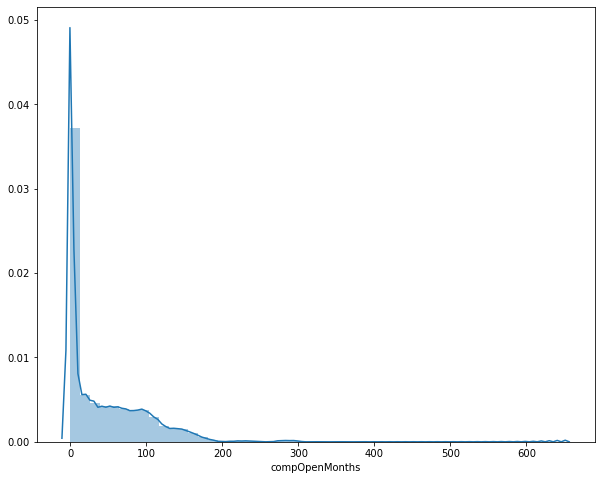

----------------------------------------------------------------------------------------------------
count    844338.000000
mean         40.944689
std          54.326440
min           0.000000
25%           0.000000
50%          16.000000
75%          73.000000
max         645.000000
Name: compOpenMonths, dtype: float64


In [59]:
# compOpenMonths - number of months for which competitor store has been open
plt.figure(figsize=(10,8))
sns.distplot(trainmerge_fe['compOpenMonths'])
plt.show()
print('-'*100)
print(trainmerge_fe['compOpenMonths'].describe())

We have an outlier, a store which has a competitior which was open for 50+ years.<br>
50% stores have competitors which have been open for less than 16 months

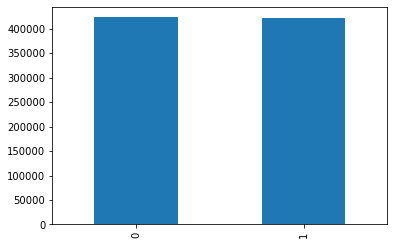

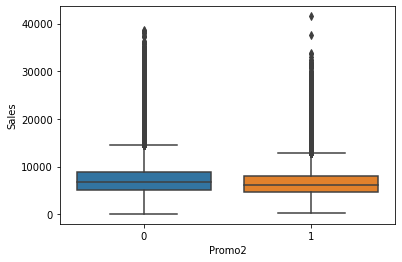

In [60]:
# promo2
trainmerge_fe['Promo2'].value_counts().plot(kind = 'bar')
plt.show()

sns.boxplot(x = 'Promo2', y = 'Sales', data = trainmerge_fe)
plt.show()

Promo 2 does not seem to have that huge of an effect on sales

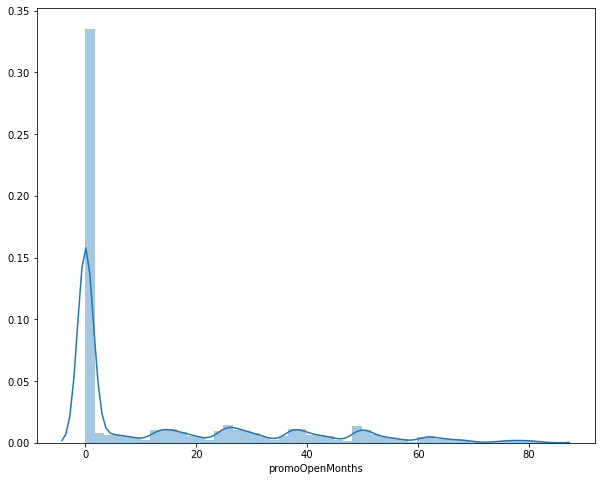

----------------------------------------------------------------------------------------------------
count    844338.000000
mean         14.841262
std          20.994192
min           0.000000
25%           0.000000
50%           0.000000
75%          27.500000
max          83.000000
Name: promoOpenMonths, dtype: float64


In [61]:
# promoOpenMonths - number of months for which promo2 has been active
plt.figure(figsize=(10,8))
sns.distplot(trainmerge_fe['promoOpenMonths'])
plt.show()
print('-'*100)
print(trainmerge_fe['promoOpenMonths'].describe())

50% stores do not run a promo2. For the stores running promo2 we can see a seasonal peak and trough like formation. <br>
A possible explanation is because promo2 starts around certain months, so the number of months since the promo is active is more dense around those differences.

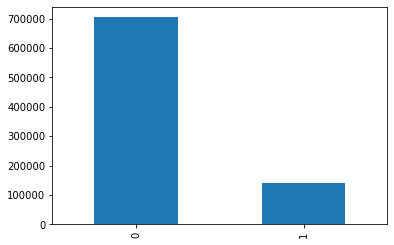

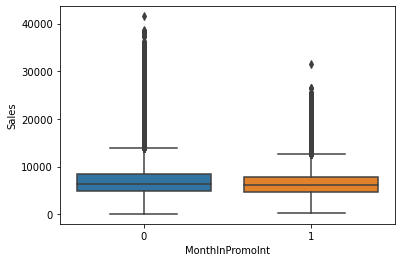

In [62]:
# promo interval - if its the start month of promo2

trainmerge_fe['MonthInPromoInt'].value_counts().plot(kind = 'bar')
plt.show()

sns.boxplot(x = 'MonthInPromoInt', y = 'Sales', data = trainmerge_fe)
plt.show()

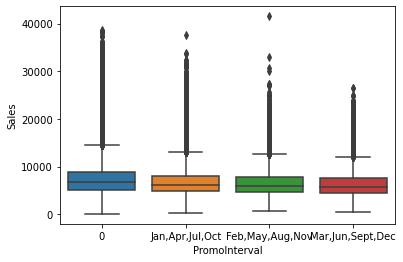

In [63]:
# promointerval
sns.boxplot(x = 'PromoInterval', y = 'Sales', data = trainmerge_fe)
plt.show()

In [64]:
# converting to categorical
trainmerge_fe['PromoInterval'] = trainmerge_fe['PromoInterval'].astype('category').cat.codes
testmerge_fe['PromoInterval'] = testmerge_fe['PromoInterval'].astype('category').cat.codes

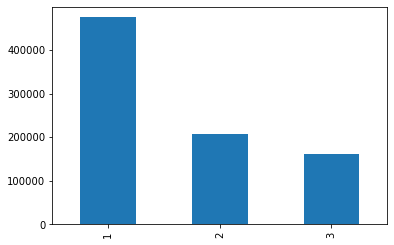

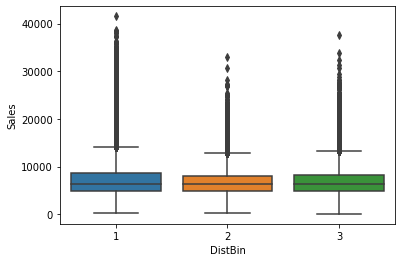

In [65]:
# DistBin - categorized competition distance
trainmerge_fe['DistBin'].value_counts().plot(kind = 'bar')
plt.show()

sns.boxplot(x = 'DistBin', y = 'Sales', data = trainmerge_fe)
plt.show()

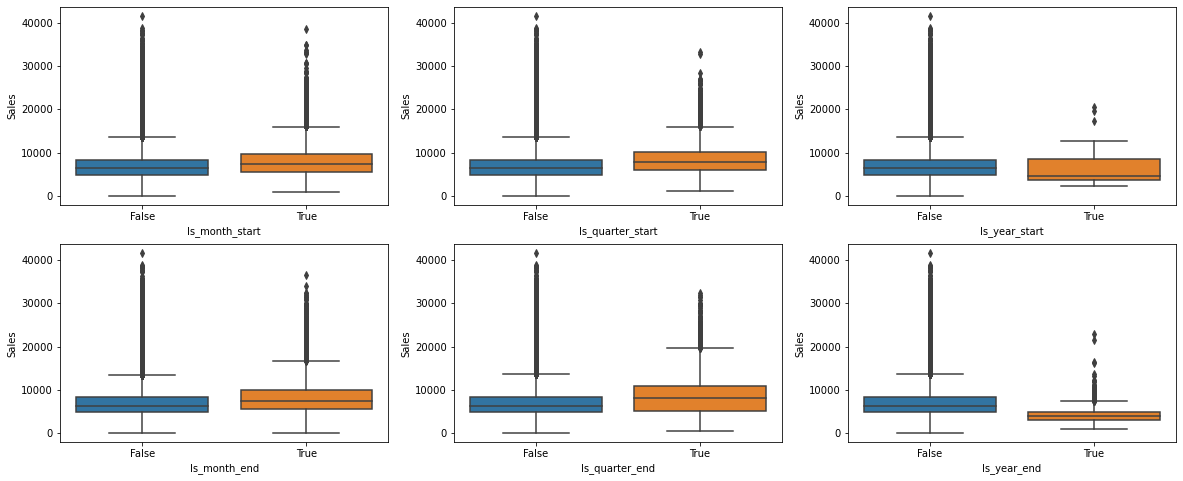

In [66]:
# start/end of month/quarter/year

start_cols = trainmerge_fe.columns[trainmerge_fe.columns.str.endswith('start')]
end_cols = trainmerge_fe.columns[trainmerge_fe.columns.str.endswith('end')]

fig, axs = plt.subplots(2, 3, figsize = (20, 8))

for i in range(len(start_cols)):
    sns.boxplot(x = start_cols[i], y = 'Sales', data = trainmerge_fe, ax = axs[0][i])
for i in range(len(end_cols)):
    sns.boxplot(x = end_cols[i], y = 'Sales', data = trainmerge_fe, ax = axs[1][i])
    
plt.show()    


When the month/quarter starts or ends the median sales are higher. For year it is not the case, makes sense since year start/end the stores must be moslty closed.

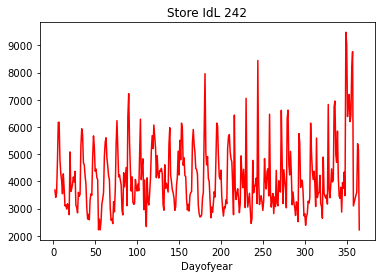

In [80]:
# Day of Year
st = random.randint(0, len(store))
plt.title(f'Store IdL {st}')
trainmerge_fe[trainmerge_fe['Store']==st].groupby('Dayofyear')['Sales'].mean().plot(color = 'r')
plt.show()

Towards the end and the beginning of the year the sales seem to drop. There is a high fluctuation

In [443]:
# wont use customers, open, elapsed, date
trainmerge_fe.drop(['Customers', 'Open', 'Elapsed'], axis = 1, inplace = True)
testmerge_fe.drop(['Open', 'Elapsed'], axis = 1, inplace = True)

In [444]:
# convert Week to int64
trainmerge_fe['Week'] = trainmerge_fe['Week'].astype(np.int64)
testmerge_fe['Week'] = testmerge_fe['Week'].astype(np.int64)

In [446]:
# save data
trainmerge_fe.to_csv(path/'Data'/'trainval.csv', index = False)
testmerge_fe.to_csv(path/'Data'/'test_submission.csv', index = False)